# Clone Project - [Sarcasm Detection : A Guide for ML and DL approache](https://www.kaggle.com/subbhashit/sarcasm-detection-a-guide-for-ml-and-dl-approach)

In [14]:
!pip install nltk

     |████████████████████████████████| 1.5 MB 2.2 MB/s 
     |████████████████████████████████| 82 kB 3.6 MB/s 
     |████████████████████████████████| 285 kB 22.4 MB/s 


In [79]:
# Basic Libraries

import numpy as np 
import pandas as pd 

# Visuals

import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.offline as py 
import plotly.figure_factory as ff 

# NLP Tasks 

import nltk 
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS 

# DL Tasks

import keras 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 
from keras.models import Sequential
from keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, Bidirectional, LSTM, GRU 
import tensorflow as tf 

# ML Tasks 

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRFRegressor, XGBRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Objective**

The objective of the notebook is to do Exploratory Data Analysis (EDA) and make prediction based on headlines as whether the headline is Sarcastic or not.

## Step 1. Loading and Viewing the Sample Dataset

In [80]:
import pandas as pd 
path = './data/'
data = pd.read_json(path + 'sarcasm.json')


In [81]:
data.describe()

,is_sarcastic
count,26709.000000
mean,0.438953
std,0.496269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


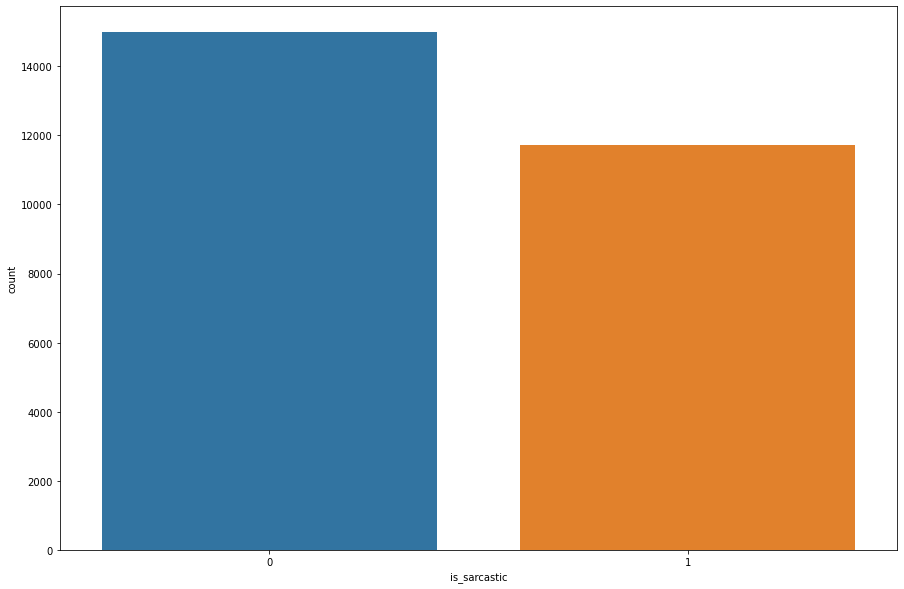

In [82]:
import warnings
warnings.filterwarnings(action='ignore')
plt.figure(figsize=(15,10))
sns.countplot(data.is_sarcastic);

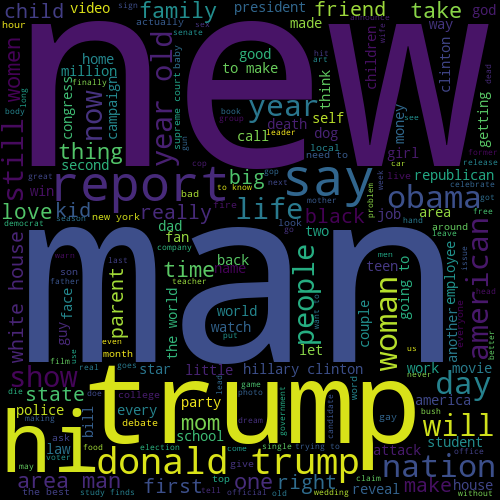

In [83]:
sen = np.array(data.headline)
wc = WordCloud(width = 500, height=500)
wc.generate(' '.join(sen))
wc.to_image()

In [84]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5,former versace store clerk sues over secret 'black code' for minority shoppers,0
1,https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0
2,https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697,mom starting to fear son's web series closest thing she will have to grandchild,1
3,https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1
4,https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb,j.k. rowling wishes snape happy birthday in the most magical way,0


In [85]:
import re 
def process(x):
    processed_tweet = re.sub(r'\W', ' ', str(x))
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet)
    processed_tweet = re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
    processed_tweet = processed_tweet.lower()
    return processed_tweet
data.headline = data.headline.apply(process)

In [86]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5,former versace store clerk sues over secret black code for minority shoppers,0
1,https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365,the roseanne revival catches up to our thorny political mood for better and worse,0
2,https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697,mom starting to fear son web series closest thing she will have to grandchild,1
3,https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302,boehner just wants wife to listen not come up with alternative debt reduction ideas,1
4,https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb,j rowling wishes snape happy birthday in the most magical way,0


## Step 2. ML Approach

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

tfidfconverter = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
data.headline = tfidfconverter.fit_transform(data.headline).toarray()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/swsong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
data.columns

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')

In [89]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5,0.0,0
1,https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365,0.0,0
2,https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697,0.0,1
3,https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302,0.0,1
4,https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb,0.0,0


In [90]:
from sklearn.model_selection import train_test_split as split, cross_val_score, KFold, GridSearchCV
# from sklearn.model_selection import train_test_split as split
# from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

x = data.drop(['is_sarcastic', 'article_link'], axis=1)
y = data['is_sarcastic']
xr, xt, yr, yt = split(x, y, test_size=0.9)

In [91]:
print('training set : ', xr.shape, yr.shape)
print('validation set : ', xt.shape, yt.shape)


training set :  (2670, 1) (2670,)
validation set :  (24039, 1) (24039,)


In [92]:
model = LGBMClassifier()
parameters = {'n_estimators':[1000]}
grid=GridSearchCV(model, parameters, cv=2)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)
yp = grid.predict(xt)


0.5616833397189803
{'n_estimators': 1000}


In [93]:
print(accuracy_score(yt, yp))
print(classification_report(yt, yp))

0.5654145347144224
              precision    recall  f1-score   support

           0       0.56      1.00      0.72     13537
           1       0.74      0.01      0.02     10502

    accuracy                           0.57     24039
   macro avg       0.65      0.50      0.37     24039
weighted avg       0.64      0.57      0.41     24039



<AxesSubplot:>

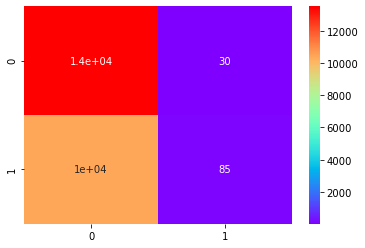

In [94]:
sns.heatmap(confusion_matrix(yt, yp), annot=True, cmap='rainbow')

**My ML Approach**

In [95]:
X_train, X_valid, y_train, y_valid = split(x, y, test_size=0.2)

In [96]:
print('training set : ', X_train.shape, y_train.shape)
print('validation set : ', X_valid.shape, y_valid.shape)


training set :  (21367, 1) (21367,)
validation set :  (5342, 1) (5342,)


In [97]:
mymodel = LGBMClassifier()
parameters = {'n_estimators':[1000]}
grid=GridSearchCV(mymodel, parameters, cv=2)
grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)
y_pred = grid.predict(X_valid)

0.5615201286045531
{'n_estimators': 1000}


In [98]:
print(accuracy_score(y_pred, y_valid))
print(classification_report(y_pred, y_valid))

0.5658929239985024
              precision    recall  f1-score   support

           0       1.00      0.57      0.72      5314
           1       0.01      0.64      0.02        28

    accuracy                           0.57      5342
   macro avg       0.50      0.60      0.37      5342
weighted avg       0.99      0.57      0.72      5342



## Step 3. DL Approach

In [62]:
labels = np.array(data.is_sarcastic)
len(np.unique(labels))

2

In [99]:
data = pd.read_json(path + 'sarcasm.json')
data.headline = data.headline.apply(process)

In [100]:
tf = Tokenizer(num_words=1000, oov_token='<OOV>')
tf.fit_on_texts(data.headline)

In [104]:
a = tf.word_index
a['<OOV>']

1

In [105]:
seq = tf.texts_to_sequences(data.headline)
seq[:5]

[[313, 1, 656, 1, 1, 48, 373, 93, 1, 6, 1, 1],
 [4, 1, 1, 1, 22, 2, 163, 1, 415, 1, 6, 254, 8, 1],
 [124, 860, 2, 838, 231, 1, 595, 1, 215, 88, 39, 46, 2, 1],
 [1, 37, 225, 358, 2, 1, 29, 317, 22, 9, 1, 1, 1, 901],
 [1, 1, 930, 1, 573, 574, 5, 4, 96, 1, 94]]

In [106]:
pad = pad_sequences(seq, maxlen=100, padding='post')
pad = np.array(pad)
pad

array([[313,   1, 656, ...,   0,   0,   0],
       [  4,   1,   1, ...,   0,   0,   0],
       [124, 860,   2, ...,   0,   0,   0],
       ...,
       [  1,   8,  55, ...,   0,   0,   0],
       [  1, 398,   1, ...,   0,   0,   0],
       [  1,   1,   6, ...,   0,   0,   0]], dtype=int32)

In [108]:
num_class = len(np.unique(labels))

In [109]:
num_class

2

In [111]:
x_train, x_test, y_train, y_test = split(pad, labels, test_size=0.1)

In [112]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [113]:
y_train = keras.utils.to_categorical(y_train, num_class)
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [114]:
y_test = keras.utils.to_categorical(y_test, num_class)

In [115]:
y_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [119]:
from keras.layers import GlobalAvgPool1D
model = Sequential()
model.add(Embedding(10000, 10, input_length=100))
model.add(Bidirectional(GRU(32, return_sequences=True)))
model.add(GlobalAvgPool1D())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_class, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 10)           100000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 64)           8448      
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 500)               32500     
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1002      
Total params: 141,950
Trainable params: 141,950
Non-trainable params: 0
________________________________________________

In [120]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [121]:
history = model.fit(x_train, y_train, epochs=10, batch_size = 128, validation_split=0.1)

Epoch 1/10
170/170 [==============================] - 10s 60ms/step - loss: 0.6462 - accuracy: 0.6057 - val_loss: 0.4970 - val_accuracy: 0.7567
Epoch 2/10
170/170 [==============================] - 8s 45ms/step - loss: 0.4332 - accuracy: 0.7979 - val_loss: 0.5077 - val_accuracy: 0.7833
Epoch 3/10
170/170 [==============================] - 8s 44ms/step - loss: 0.4024 - accuracy: 0.8169 - val_loss: 0.4213 - val_accuracy: 0.8111
Epoch 4/10
170/170 [==============================] - 8s 45ms/step - loss: 0.3787 - accuracy: 0.8290 - val_loss: 0.4044 - val_accuracy: 0.8087
Epoch 5/10
170/170 [==============================] - 8s 45ms/step - loss: 0.3760 - accuracy: 0.8298 - val_loss: 0.4032 - val_accuracy: 0.8136
Epoch 6/10
170/170 [==============================] - 8s 44ms/step - loss: 0.3709 - accuracy: 0.8333 - val_loss: 0.4065 - val_accuracy: 0.8145
Epoch 7/10
170/170 [==============================] - 8s 45ms/step - loss: 0.3696 - accuracy: 0.8335 - val_loss: 0.4152 - val_accuracy: 0.817

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Loss : {}'.format(score[0]))
print('Accuracy : {}'.format(score[1]))

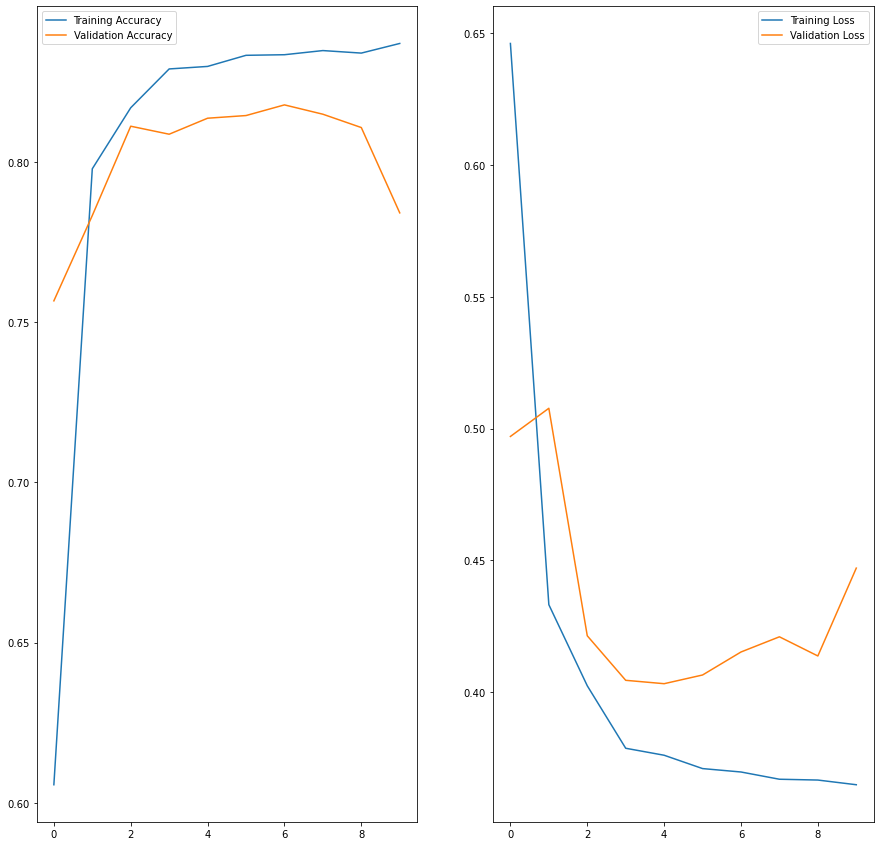

In [122]:
import matplotlib.pyplot as plt 
figure = plt.figure(figsize=(15,15))
ax = figure.add_subplot(121)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.legend(['Training Accuracy', 'Validation Accuracy'])
bx = figure.add_subplot(122)
bx.plot(history.history['loss'])
bx.plot(history.history['val_loss'])
bx.legend(['Training Loss', 'Validation Loss'])
plt.show()